In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import talib as ta
import datetime

In [3]:
df = yf.download('SBIN.NS', '2021-01-18', '2021-07-13')
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-18,303.500000,308.649994,292.200012,294.450012,291.756378,54969750
2021-01-19,297.649994,302.500000,296.399994,298.600006,295.868408,35803901
2021-01-20,298.799988,304.700012,296.850006,302.549988,299.782257,33759304
2021-01-21,304.000000,305.149994,291.500000,294.850006,292.152710,29995203
2021-01-22,295.500000,298.000000,282.399994,283.700012,281.104706,44440810
...,...,...,...,...,...,...
2021-07-06,431.700012,436.500000,428.200012,429.750000,429.750000,20195278
2021-07-07,429.350006,434.000000,427.549988,432.850006,432.850006,14473774
2021-07-08,432.799988,435.399994,422.100006,424.450012,424.450012,21433043


In [4]:
df['returns'] = np.log(df['Adj Close']/df['Adj Close'].shift(1))
df

,Open,High,Low,Close,Adj Close,Volume,returns
Date,,,,,,,
2021-01-18,303.500000,308.649994,292.200012,294.450012,291.756378,54969750,NaN
2021-01-19,297.649994,302.500000,296.399994,298.600006,295.868408,35803901,0.013996
2021-01-20,298.799988,304.700012,296.850006,302.549988,299.782257,33759304,0.013142
2021-01-21,304.000000,305.149994,291.500000,294.850006,292.152710,29995203,-0.025780
2021-01-22,295.500000,298.000000,282.399994,283.700012,281.104706,44440810,-0.038549
...,...,...,...,...,...,...,...
2021-07-06,431.700012,436.500000,428.200012,429.750000,429.750000,20195278,-0.006725
2021-07-07,429.350006,434.000000,427.549988,432.850006,432.850006,14473774,0.007188
2021-07-08,432.799988,435.399994,422.100006,424.450012,424.450012,21433043,-0.019597


In [5]:
df['position'] = np.sign(df['returns'])
df

,Open,High,Low,Close,Adj Close,Volume,returns,position
Date,,,,,,,,
2021-01-18,303.500000,308.649994,292.200012,294.450012,291.756378,54969750,NaN,NaN
2021-01-19,297.649994,302.500000,296.399994,298.600006,295.868408,35803901,0.013996,1.0
2021-01-20,298.799988,304.700012,296.850006,302.549988,299.782257,33759304,0.013142,1.0
2021-01-21,304.000000,305.149994,291.500000,294.850006,292.152710,29995203,-0.025780,-1.0
2021-01-22,295.500000,298.000000,282.399994,283.700012,281.104706,44440810,-0.038549,-1.0
...,...,...,...,...,...,...,...,...
2021-07-06,431.700012,436.500000,428.200012,429.750000,429.750000,20195278,-0.006725,-1.0
2021-07-07,429.350006,434.000000,427.549988,432.850006,432.850006,14473774,0.007188,1.0
2021-07-08,432.799988,435.399994,422.100006,424.450012,424.450012,21433043,-0.019597,-1.0


In [6]:
df['strategy'] = df['position'].shift(1)*df['returns']
df

,Open,High,Low,Close,Adj Close,Volume,returns,position,strategy
Date,,,,,,,,,
2021-01-18,303.500000,308.649994,292.200012,294.450012,291.756378,54969750,NaN,NaN,NaN
2021-01-19,297.649994,302.500000,296.399994,298.600006,295.868408,35803901,0.013996,1.0,NaN
2021-01-20,298.799988,304.700012,296.850006,302.549988,299.782257,33759304,0.013142,1.0,0.013142
2021-01-21,304.000000,305.149994,291.500000,294.850006,292.152710,29995203,-0.025780,-1.0,-0.025780
2021-01-22,295.500000,298.000000,282.399994,283.700012,281.104706,44440810,-0.038549,-1.0,0.038549
...,...,...,...,...,...,...,...,...,...
2021-07-06,431.700012,436.500000,428.200012,429.750000,429.750000,20195278,-0.006725,-1.0,-0.006725
2021-07-07,429.350006,434.000000,427.549988,432.850006,432.850006,14473774,0.007188,1.0,-0.007188
2021-07-08,432.799988,435.399994,422.100006,424.450012,424.450012,21433043,-0.019597,-1.0,-0.019597


<AxesSubplot:xlabel='Date'>

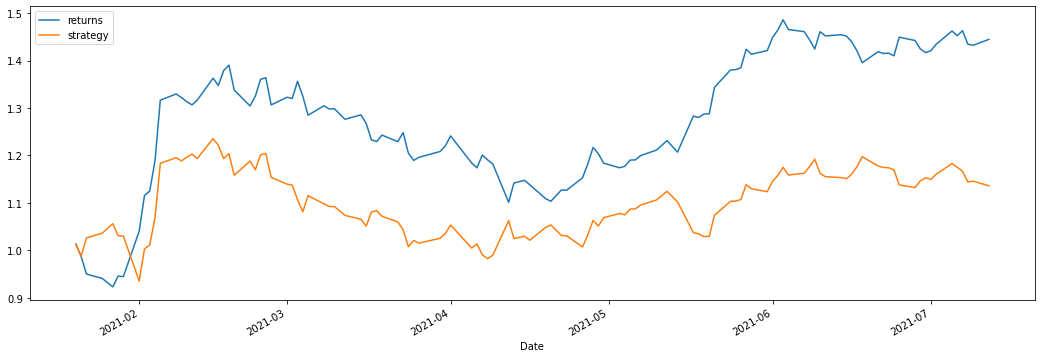

In [8]:
df[['returns', 'strategy']].dropna().cumsum().apply(np.exp).plot(figsize=(18,6))

<AxesSubplot:xlabel='Date'>

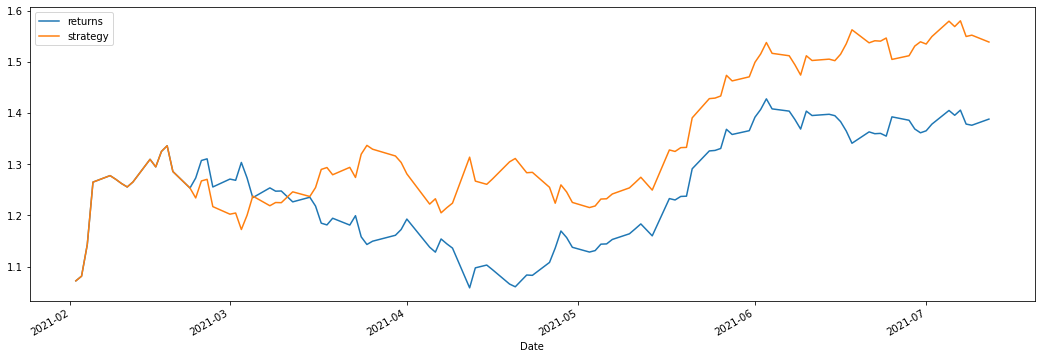

In [9]:
df['position'] = np.sign(df['returns'].rolling(9).mean())
df['strategy'] = df['position'].shift(1)*df['returns']
df[['returns', 'strategy']].dropna().cumsum().apply(np.exp).plot(figsize=(18,6))

<AxesSubplot:xlabel='Date'>

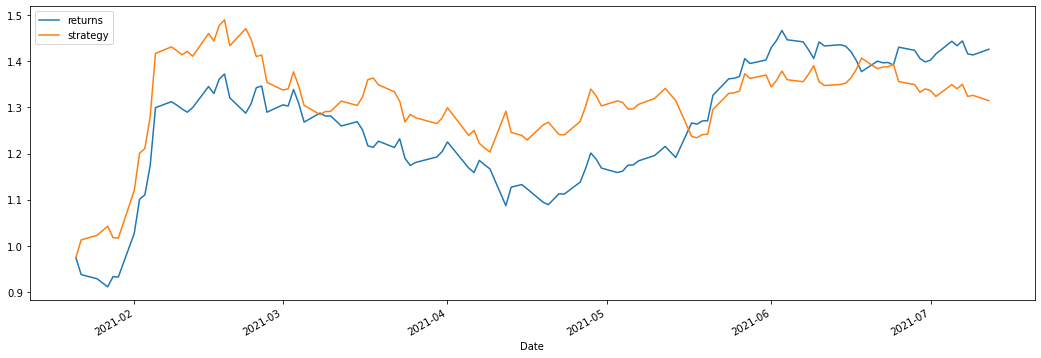

In [10]:
df['position'] = np.sign(df['returns'].rolling(2).mean())
df['strategy'] = df['position'].shift(1)*df['returns']
df[['returns', 'strategy']].dropna().cumsum().apply(np.exp).plot(figsize=(18,6))

<AxesSubplot:title={'center':'TAMO'}, xlabel='Date'>

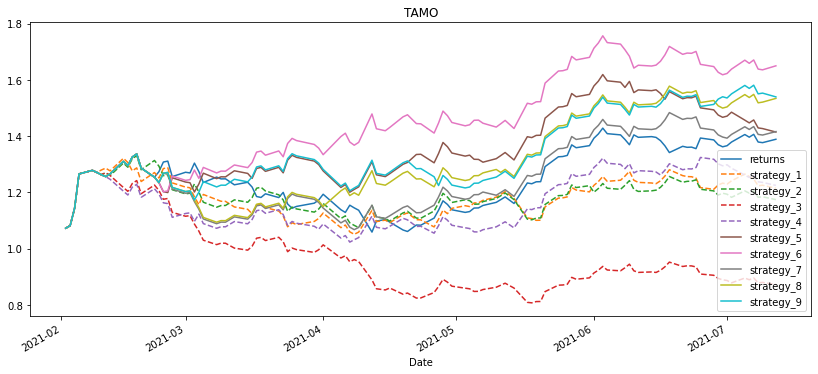

In [13]:
to_plot = ['returns']
for m in  [1,2,3,4,5,6,7,8,9]:
    df['position_%d' %m] = np.sign(df['returns'].rolling(m).mean())
    df['strategy_%d' %m] = (df['position_%d' %m].shift(1)*df['returns'])
    to_plot.append('strategy_%d' %m)
df[to_plot].dropna().cumsum().apply(np.exp).plot(title='TAMO', figsize=(14,6), style=['-','--', '--', '--', '--'])

In [14]:
class MomVectorBacktester(object):
    def __init__(self, symbol, start, end, amount, tc):
        self.symbol = symbol
        self.start = start
        self.end = end
        self.amount = amount
        self.tc = tc
        self.results = None
        self.get_data()
        
    def get_data(self):
        df = yf.download(f'{self.symbol}.NS', self.start, self.end)
        df['returns'] = np.log(df['Adj Close']/df['Adj Close'].shift(1))
        self.data = df
    
    def run_strategy(self, momentum=1):
        self.momentum = momentum
        data = self.data.copy().dropna()
        data['position'] = np.sign(data['returns'].rolling(momentum).mean())
        data['strategy'] = data['position'].shift(1)*data['returns']
        #determine when a trade takes place
        trades = data['position'].diff().fillna(0) != 0
        #substract transaction costs from return when trade takes place
        data['strategy'][trades] -= self.tc
        data['creturns'] = self.amount*data['returns'].cumsum().apply(np.exp)
        data['cstrategy'] = self.amount *data['strategy'].cumsum().apply(np.exp)
        self.results = data
        #absolute performance of the strategy
        aperf = self.results['cstrategy'].iloc[-1]
        #out performace of the strategy
        operf = aperf - self.results['creturns'].iloc[-1]
        return round(aperf,2), round(operf,2)
    
    def plot_results(self):
        if self.results is None:
            print('No results to plot yet. Run a strategy.')
        title = '%s | TC = %.4f' % (self.symbol, self.tc)
        self.results[['creturns', 'cstrategy']].plot(title=title, figsize=(14,6))

[*********************100%***********************]  1 of 1 completed


<ipython-input-14-d8bdb1d41776>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['strategy'][trades] -= self.tc


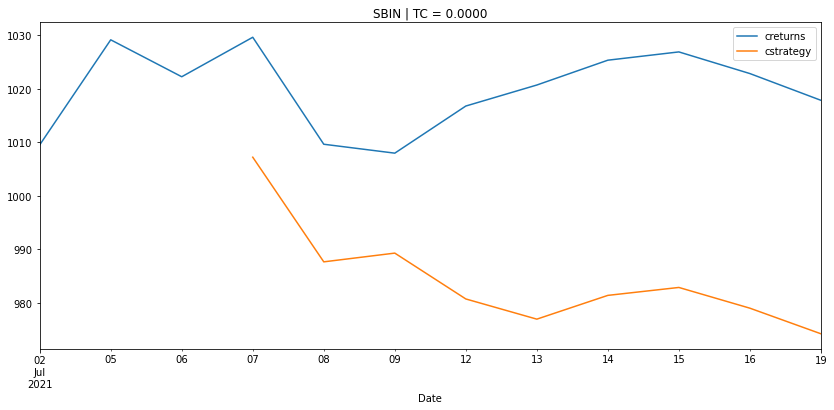

In [37]:
mombt = MomVectorBacktester('SBIN', '2021-07-01', '2021-07-20', 1000, 0.0)
mombt.run_strategy(momentum = 3)
mombt.plot_results()

[*********************100%***********************]  1 of 1 completed


<ipython-input-36-d8bdb1d41776>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['strategy'][trades] -= self.tc


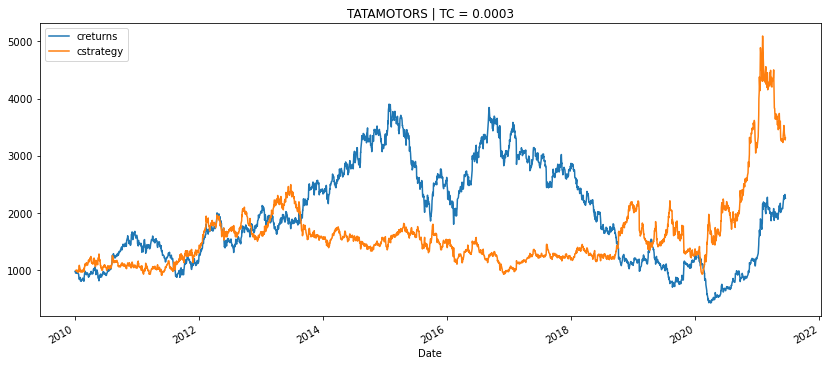

In [38]:
mombt = MomVectorBacktester('TATAMOTORS', '2010-01-01', '2021-06-18', 1000, 0.0003)
mombt.run_strategy(momentum=3)
mombt.plot_results()